<a href="https://colab.research.google.com/github/albinovik/iter_methods_course/blob/main/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%BF%D0%B5%D1%80%D0%B2%D0%BE%D0%B3%D0%BE_%D0%BF%D0%BE%D1%80%D1%8F%D0%B4%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ИТЕРАЦИОННЫЕ МЕТОДЫ ОПТИМИЗАЦИИ ПЕРВОГО ПОРЯДКА. СЛУЧАЙ ОДНОМЕРНОЙ ОПТИМИЗАЦИИ.**

Оптимизация понимается как выбор наилучшего варианта из имеющихся. Это может быть вариант с минимальным значением некоторого параметра, либо с максимальным. Понятно, что в математических терминах мы здесь мыслим экстремумами некоторой функции. Таким образом, задачи оптимизации заключаются в нахождении экстремума функции в заданной области.

**Методы оптимизации** предназначены для поиска единственного точечного локального экстремума. Они классифицируются, как и все методы оптимизации, по порядку используемых в них производных целевой функции.

К *методам нулевого порядка* относятся методы случайного поиска, сканирования, оптимального поиска и другие. 

К *методам первого порядка* относятся: метод деления отрезка пополам (метод Больцано), метод касательных и другие.

К *методам второго порядка* принадлежат: методы Ньютона и методы квадратичной аппроксимации и интерполяции.

**МЕТОДЫ ПЕРВОГО ПОРЯДКА.** Методы первого порядка применяются, как правило, для оптимизации выпуклых дифференцируемых функций.

**Метод деления отрезка пополам (метод Больцано).** Пусть φ(x), заданная на промежутке [a, b], является выпуклой дифференцируемой. В рассматриваемом методе очередной промежуток [ak-1, bk-1] делится пополам средней точкой хk= ½( ak-1 + bk-1), вычисляется производная φ'(xk) и по еѐ знаку выбирается новый промежуток [ak, bk]. Ниже идея метода проиллюстрирована на рисунке и представлена схемой алгоритма.

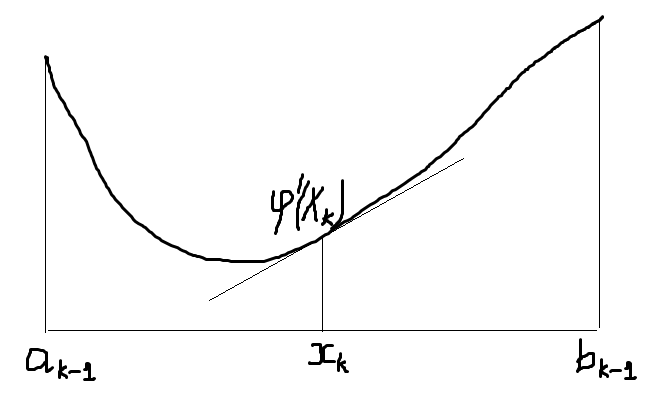

In [ ]:
import sympy as sym

def F(x):
    return (x**3)/3 - x**2 - 3*x

x = sym.Symbol('x')
d_f = F(x).diff(x)
d_f


x**2 - 2*x - 3

In [ ]:
d_f.subs(x,0)

-3

In [ ]:
def F(x):
    return x**3 - x**2 + 1

In [ ]:
import sympy as sym

x = sym.Symbol('x')

def bolzano(a, b, e):
  L = b - a;
  d_f = F(x).diff(x)
  while L > e:
    xk = (b + a)/2
    if d_f.subs(x,xk) < 0:
      a = xk
      print('b')
    else: 
      b = xk
      print('a')
    L = b - a
  return print('L = ', L, 'xk = ', xk)
  

In [ ]:
bolzano(0,10, 0.0001)

a
a
a
b
a
a
a
b
a
a
a
b
a
a
a
b
a
L =  7.62939453125e-05 xk =  0.6667327880859375


**Метод касательных.** Пусть φ(x), заданная на промежутке [a, b], является выпуклой дифференцируемой. В методе касательных разбиение промежутка производится точкой хk , в которой пересекаются касательные к графику функции φ(х) в концевых точках отрезка [ak,bk]. Алгоритм метода касательных формулируется также как метод Больцано, только xk вычисляется иначе.

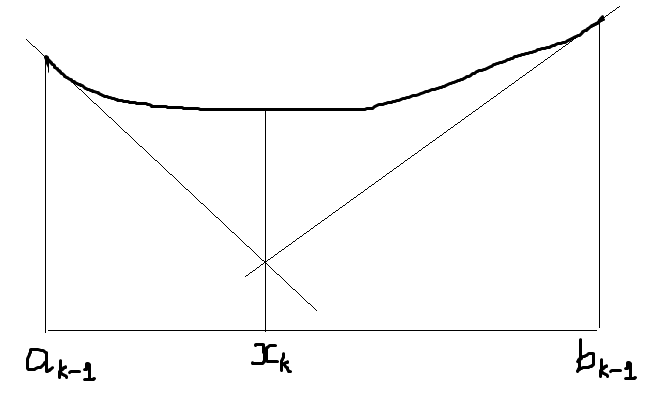

Поиск пересечения касательных y1 = ϕ(ak-1) + ϕ'(ak-1)(xk - ak-1) и y2 = ϕ(bk-1) + ϕ'(bk-1)(xk - bk-1) приводит к решению системы двух уравнений, откуда:

xk = {[ φ’(bk-1)bk-1 - φ(bk-1)] – [φ’(ak-1)ak-1- φ(ak-1)]}/[ φ’(bk-1)- φ’(ak-1)]

In [ ]:
def F(x):
    return x**2

In [ ]:
import sympy as sym

x = sym.Symbol('x')

def tangent(a, b, e):
  L = b - a;
  d_f = F(x).diff(x)
  while L > e:
    p1 = (d_f.subs(x,b) * b - F(b)) 
    p2 = (d_f.subs(x,a) * a - F(a))
    p3 = d_f.subs(x,b) - d_f.subs(x,a)
    xk = (p1 - p2)/p3
    if d_f.subs(x,xk) < 0:
      a = xk
      print('b')
    else: 
      b = xk
      print('a')
    L = b - a
  return print('L = ', float(L), 'xk = ', float(xk))

In [ ]:
tangent(0, 10, 0.01)

a
a
a
a
a
a
a
a
a
a
L =  0.009765625 xk =  0.009765625
